# **Indian Start-up Funding Analysis (2018 - 2021)**

## Importing all necessary modules

In [9]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings. filterwarnings('ignore')

## **Data Loading**

### loading from csv files

In [247]:
# Loading 2018 funds data
data_2018 = pd.read_csv('data\startup_funding2018.csv')

# Data preview
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [248]:
# Loading 2019 funds data
data_2019 = pd.read_csv('data\startup_funding2019.csv')

# Data preview
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


### Loading from the database

In [3]:
# Loading environment variables from .env file
environment_variables = dotenv_values('.env')

# Getting the values for the credentials set in the .env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# Creating a connection string
connection_string = f"DRIVER={{SQL Server}}; \
                    SERVER={server}; \
                    DATABASE={database}; \
                    UID={username}; \
                    PWD={password};"

# Connecting to the server
connection = pyodbc.connect(connection_string)

In [ ]:
# Loading 2020 funds data
data_2020 = pd.read_sql_query(
    "SELECT * FROM LP1_startup_funding2020", connection)

# Saving the DataFrame to a CSV file
data_2020.to_csv('data/startup_funding2020.csv', index=False)

data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [ ]:
# Loading 2021 funds data
data_2021 = pd.read_sql_query(
    "SELECT * FROM LP1_startup_funding2021", connection)

# Saving the DataFrame to a CSV file
data_2021.to_csv('data/startup_funding2021.csv', index=False)

# Data preview
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


## **Data information**

In [ ]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [ ]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [ ]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [ ]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [ ]:
data_2018.shape, data_2019.shape, data_2020.shape, data_2021.shape

((526, 6), (89, 9), (1055, 10), (1209, 9))

## **Data Cleaning**

### Columns

In [ ]:
def standardize_column_names(df):
    # Creating a mapping based on common patterns found in the column names
    df.columns = [re.sub(r'(?i)^Company.*Name$', 'Company_Brand', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^Amount.*$', 'Amount', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^What.*does$', 'What_it_does', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^Industry$', 'Sector', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^Round.*Series$', 'Stage', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^Location$', 'HeadQuarter', col)
                  for col in df.columns]
    df.columns = [re.sub(r'(?i)^About.*Company$', 'What_it_does', col)
                  for col in df.columns]
    return df


# Applying the function to standardize names
data_2018 = standardize_column_names(data_2018)
data_2019 = standardize_column_names(data_2019)
data_2020 = standardize_column_names(data_2020)
data_2021 = standardize_column_names(data_2021)

# Ensuring all DataFrames have the same set of columns
columns = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
           'Founders', 'Investor', 'Amount', 'Stage', 'Fund_Year',]

# Adding a new column 'Fund_Year' to each DataFrame
data_2018['Fund_Year'] = 2018
data_2019['Fund_Year'] = 2019
data_2020['Fund_Year'] = 2020
data_2021['Fund_Year'] = 2021

data_2018 = data_2018.reindex(columns=columns, fill_value=None)
data_2019 = data_2019.reindex(columns=columns)
data_2020 = data_2020.reindex(columns=columns)
data_2021 = data_2021.reindex(columns=columns)

# Merging all DataFrames
data = pd.concat([data_2018, data_2019, data_2020,
                 data_2021], ignore_index=True)

# Saving the DataFrame to a CSV file
data.to_csv('data/startup_funding_merged.csv', index=False)

# info of the combined DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2790 non-null   object 
 1   Founded        2110 non-null   float64
 2   HeadQuarter    2765 non-null   object 
 3   Sector         2861 non-null   object 
 4   What_it_does   2879 non-null   object 
 5   Founders       2334 non-null   object 
 6   Investor       2253 non-null   object 
 7   Amount         2622 non-null   object 
 8   Stage          1941 non-null   object 
 9   Fund_Year      2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 225.1+ KB


### Duplicates

In [251]:
data.duplicated().sum()

23

In [252]:
data = data.drop_duplicates()

### Company_Brand, Founded, What_it_does & Investors

In [253]:
# Trimming white spaces and standardize text format to title case for 'Company_Brand'
data['Company_Brand'] = data['Company_Brand'].str.strip().str.title()

# Checking for null values in 'Company_Brand'
null_company_brand = data['Company_Brand'].isnull().sum()

# Replacing null values in 'Company_Brand' with the placeholder "Unknown"
data['Company_Brand'].fillna('Unknown', inplace=True)

# Replacing null values in 'Founded' with the median year and ensuring all entries are integers
median_year = data['Founded'].median()
data['Founded'].fillna(median_year, inplace=True)
data['Founded'] = data['Founded'].astype(int)

# Trimming white spaces and standardize text format to lower case for 'What_it_does'
data['What_it_does'] = data['What_it_does'].str.strip().str.lower()

# Trimming white spaces and standardize text format to title case for 'Founders'
data['Founders'] = data['Founders'].str.strip().str.title()

# Filling null values in 'Founders' with 'Unknown'
data['Founders'].fillna('Unknown', inplace=True)

# Trimming white spaces and standardize text format to title case for 'Investor'
data['Investor'] = data['Investor'].str.strip().str.title()

# Filling null values in 'Investor' with 'Undisclosed'
data['Investor'].fillna('Undisclosed', inplace=True)

### Headquarter

In [254]:
# Function to simplify and standardize headquarters
def standardize_headquarters(hq):
    if pd.isna(hq):
        return "Unknown"              # Filling null values with a placeholder
    city = hq.split(',')[0].strip()   # Simplifying the entry to city name only
    return city.title()               # Converting to title case

data['HeadQuarter'] = data['HeadQuarter'].apply(standardize_headquarters)

# Check the unique values after cleaning
data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', 'Unknown',
       'Telangana', 'Gurugram', 'Surat', 'Rajasthan', 'Tirunelveli',
       'Singapore', 'Gujarat', 'Kerala', 'Frisco', 'California',
       'Dhingsara', 'New York', 'Patna', 'San Francisco', 'San Ramon',
       'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area', 'Bangaldesh',
       'London', 'Milano', 'Palmwoods', 'France', 'Samastipur', 'Irvine',
       'Tumkur

In [255]:
# Listing irrelevant entries 
irrelevant_entries = ['Computer Games', 'Food & Beverages',
                      'Online Media', 'Information Technology & Services']

# Mapping of common misspellings or variations to standardized city names
city_corrections = {
    'Bangalore City': 'Bangalore',
    'Bengaluru': 'Bangalore',
    'Gurugram': 'Gurgaon',
    'Noida': 'Noida',
    'Hyderebad': 'Hyderabad',
    'Banglore': 'Bangalore',
    'Ahmadabad': 'Ahmedabad',
    'Rajastan': 'Rajasthan',
    'San Franciscao': 'San Francisco',
    'San Francisco Bay Area': 'San Francisco',
    'Telugana': 'Telangana'
}

# Removing "\t#Ref!" from any entries
data['HeadQuarter'] = data['HeadQuarter'].replace(
    to_replace=r'\t#Ref!', value='', regex=True)


def correct_city_names(city):
    if city in irrelevant_entries:
        return "Unknown"  # Changing to "Unknown" for irrelevant categories
    return city_corrections.get(city, city)

data['HeadQuarter'] = data['HeadQuarter'].apply(correct_city_names)

# Verify the corrections 
data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'India', 'Hubli', 'New Delhi', 'Chennai', 'Mohali',
       'Kolkata', 'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur',
       'Haryana', 'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand',
       'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur',
       'Trivandrum', 'Ernakulam', 'Kormangala', 'Uttar Pradesh',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Alleppey',
       'Chandigarh', 'Guindy', 'Lucknow', 'Unknown', 'Telangana', 'Surat',
       'Rajasthan', 'Tirunelveli', 'Singapore', 'Gujarat', 'Kerala',
       'Frisco', 'California', 'Dhingsara', 'New York', 'Patna',
       'San Francisco', 'San Ramon', 'Paris', 'Plano', 'Sydney',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipur', 'Irvine', 'Tumkur', 'Newcastle Upon Tyne',
       'Shanghai', 'Jiaxing', 'Ludhiana', 'Dehradu

### Amount

In [260]:
# Define conversion rates for each year
conversion_rates = {
    2018: 0.01482,
    2019: 0.01434,
    2020: 0.01331,
    2021: 0.01378
}

# Optimized function to clean and convert Amount values
def clean_amount(amount, year):
    # Ensure the amount is treated as a string
    if pd.isnull(amount):
        return 0
    amount = str(amount).strip()
    # Handle specific non-numeric strings
    if amount in ['-', '—', '--', 'Undisclosed', 'Undisclosed ']:
        return 0
    # Remove currency symbols and commas
    amount = amount.replace(',', '').replace('$', '').replace('₹', '')
    try:
        # Convert based on year if it's in rupees
        if '₹' in amount:
            return float(amount) * conversion_rates[year]
        # Otherwise, assume it's already in dollars
        return float(amount)
    except ValueError:
        # If conversion fails, return 0
        return 0

# Apply the cleaning function to the Amount column
data['Amount'] = data.apply(lambda row: clean_amount(
    row['Amount'], row['Fund_Year']), axis=1)

### Stage

In [262]:
data['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B',
       'Bridge', 'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Seed Funding', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed

In [263]:
data['Stage'].isnull().sum()

929

In [264]:
# Dictionary for mapping stages to standardized terms
stage_mapping = {
    r'(?i)^angel$': 'Pre-Seed',
    r'(?i)^seed (funding|fund|round|investment|a|\+)?$': 'Seed',
    r'(?i)^pre[-\s]?seed( round)?$': 'Pre-Seed',
    r'(?i)^pre[-\s]?series[-\s]?a1?$': 'Pre-Series A',
    r'(?i)^pre[-\s]?series[-\s]?a$': 'Pre-Series A',
    r'(?i)^pre- series a$': 'Pre-Series A',
    r'(?i)^pre[-\s]?series[-\s]?b$': 'Pre-Series B',
    r'(?i)^pre[-\s]?series[-\s]?c$': 'Pre-Series C',
    r'(?i)^early seed$': 'Pre-Seed',
    r'(?i)^series a[-\s]?[1+2]?$': 'Series A',
    r'(?i)^series b[-\s]?[+2-3]?$': 'Series B',
    r'(?i)^series c, d$': 'Series C',
    r'(?i)^series d1$': 'Series D',
    r'(?i)^series e2$': 'Series E',
    r'(?i)^series f[1-2]?$': 'Series F',
    r'(?i)^venture - series unknown$': 'Venture',
    r'(?i)^post series a$': 'Post-Series A',
    r'(?i)^non-equity assistance$': 'Other',
    r'(?i)^corporate round$': 'Other',
    r'(?i)^bridge( round)?$': 'Other',
    r'(?i)^private equity$': 'PE',
    r'(?i)^secondary market$': 'Other',
    r'(?i)^debt financing$': 'Debt',
    r'(?i)^post-ipo (debt|equity)$': 'Post-IPO',
    r'(?i)^undisclosed$': 'Other',
    r'(?i)^funding round$': 'Other',
    r'(?i)^fresh funding$': 'Other',
    r'(?i)^mid series$': 'Other',
    r'(?i)^edge$': 'Other',
    r'(?i)^grant$': 'Grant',
    r'(?i)^seies a$': 'Series A',
    r'(?i)^pre[-\s]?series$': 'Pre-Seed',
    r'(?i)^angel round$': 'Pre-Seed',
    r'(?i)^seed round & series a$': 'Seed',
    r'(?i)^series i$': 'Series I'
}

# Applying the mappings using regular expressions
for pattern, replacement in stage_mapping.items():
    data['Stage'] = data['Stage'].str.replace(pattern, replacement, regex=True)

data['Stage'] = data['Stage'].str.replace(r'(?i)seed\+', 'Seed', regex=True)

# Replacing numeric and erroneous entries with 'Unknown'
data['Stage'] = data['Stage'].replace(
    r'\$\d+', 'Unknown', regex=True)  # Catch dollar amounts
data['Stage'] = data['Stage'].replace(
    r'https?://\S+', 'Unknown', regex=True)  # Catch URLs

# Handle NaN values
data['Stage'].fillna('Unknown', inplace=True)


data['Stage'].unique()

array(['Seed', 'Series A', 'Pre-Seed', 'Series B', 'PE', 'Venture',
       'Grant', 'Debt', 'Post-IPO', 'Series H', 'Series C', 'Series E',
       'Other', 'Unknown', 'Series D', 'Pre-Series A', 'Series G',
       'Post-Series A', 'Series F', 'Pre-Series C', 'Pre-Series B',
       'Series I'], dtype=object)

### Sector

In [265]:
# Comprehensive mappings and sector categories (redefined here for completeness)
comprehensive_mappings = {
    'fintech': 'financial services', 'credit': 'financial services', 'lending': 'financial services',
    'saas': 'software as a service', 'ecommerce': 'e-commerce', 'ecommerce platforms': 'e-commerce',
    'retail': 'e-commerce', 'marketing': 'brand marketing', 'event promotion': 'brand marketing',
    'tech': 'technology', 'tech company': 'technology', 'tech platform': 'technology',
    'tech startup': 'technology', 'cloud computing computer saas software': 'software as a service',
    'software company': 'software', 'software startup': 'software',
    'cloud computing computer software': 'software', 'cloud computing enterprise software': 'software',
    'cloud infrastructure paas saas': 'software as a service', 'edtech': 'education',
    'elearning': 'education', 'higher education': 'education', 'health care': 'health & wellness',
    'wellness': 'health & wellness', 'medical': 'health & wellness', 'healthcare services': 'health & wellness',
    'social commerce': 'e-commerce', 'social ecommerce': 'e-commerce', 'online portals': 'e-commerce',
    'startup': 'startups', 'startup laboratory': 'startups', 'real estate': 'property',
    'commercial real estate': 'property', 'coworking': 'property',
    'communities coworking incubators': 'property', 'commercial real estate coworking office administration real estate': 'property',
    'transport': 'transportation', 'transport automation': 'transportation', 'transport rentals': 'transportation',
    'travel tech': 'travel', 'travel saas': 'travel', 'traveltech': 'travel', 'virtual banking': 'financial services',
    'banking': 'financial services', 'ai': 'artificial intelligence'
}
sector_categories = {
    'Technology': ['artificial intelligence', 'cloud computing', 'software', 'software as a service'],
    'E-commerce': ['e-commerce', 'social commerce', 'online portals'],
    'Fintech': ['financial services'],
    'Healthcare': ['health & wellness'],
    'Education': ['education'],
    'Real Estate': ['property'],
    'Transportation': ['transportation'],
    'Travel': ['travel'],
    'Startups': ['startups']
}


def clean_and_categorize(sector):
    if pd.isna(sector):
        return sector, 'Other'

    # Clean sector description
    sector = sector.lower()
    sector = re.sub(r'[^\w\s]', '', sector)
    sector = re.sub(r'\s+', ' ', sector).strip()

    # Apply mappings and categorize
    mapped_sector = comprehensive_mappings.get(sector, sector)
    for category, keywords in sector_categories.items():
        if any(keyword in mapped_sector for keyword in keywords):
            return mapped_sector, category
    return mapped_sector, 'Other'


# Apply cleaning and categorization function to the "Sector" column
data[['Sector', 'Category']] = data['Sector'].apply(
    lambda x: pd.Series(clean_and_categorize(x)))

# Mapping dictionary based on the user's specified categories
category_mapping = {
    'technology': ['software', 'ai', 'artificial intelligence', 'iot', 'internet of things', 'machine learning', 'tech', 'saas', 'cloud computing', 'software as a service', 'blockchain'],
    'e-commerce': ['e-commerce', 'online shopping', 'online market', 'online retail', 'ecommerce'],
    'fintech': ['fintech', 'digital payment', 'personal finance', 'insurtech', 'investment platform', 'banking', 'financial services'],
    'healthcare': ['telemedicine', 'biotechnology', 'pharmaceuticals', 'health analytics', 'health & wellness', 'medical', 'healthcare'],
    'education': ['edtech', 'e-learning', 'online courses', 'learning management system', 'educational technology'],
    'agriculture': ['agriculture', 'agritech', 'precision farming', 'farm management software'],
    'renewable energy': ['renewable energy', 'solar', 'wind energy', 'cleantech'],
    'food and beverages': ['food processing', 'health-centric products', 'food delivery', 'catering', 'food and beverage'],
    'mobility and transportation': ['electric vehicle', 'ride-sharing', 'logistics', 'transportation'],
    'retail': ['retail', 'virtual reality shopping', 'retail analytics', 'customer engagement'],
    'real estate': ['real estate', 'property management', 'real estate investment', 'virtual tours', 'property'],
    'manufacturing': ['digital manufacturing', 'robotics', 'manufacturing', 'supply chain optimization'],
    'tourism and hospitality': ['tourism', 'hospitality', 'travel tech', 'booking platform', 'experiential travel'],
    'media and entertainment': ['media', 'entertainment', 'digital media', 'streaming services', 'content creation', 'gaming'],
    'sports technology': ['sports', 'sports analytics', 'athlete performance tracking', 'fan engagement'],
    'beauty and wellness': ['beauty', 'cosmetics', 'wellness', 'wellness apps', 'personalized beauty solutions'],
    'legal tech': ['legal tech', 'legal processes', 'document management', 'client services'],
    'human resources': ['human resources', 'recruitment', 'employee engagement', 'performance management'],
    'cybersecurity': ['cybersecurity', 'network security', 'risk management'],
    'space technology': ['space technology', 'satellite communications', 'space exploration']
}


def map_sector_to_category(sector):
    if pd.isna(sector):
        return 'Other'  # Handle NaN values explicitly
    sector = sector.lower()
    for category, keywords in category_mapping.items():
        if any(keyword in sector for keyword in keywords):
            return category
    return 'Other'  # Default category if no match is found


# Apply the new mapping to the 'Sector' column
data['Category'] = data['Sector'].apply(map_sector_to_category)

# Update the mapping dictionary to incorporate the new adjustments
category_mapping.update({
    'media and entertainment': category_mapping['media and entertainment'] + ['advertising', 'marketing', 'digital marketing'],
    'mobility and transportation': category_mapping['mobility and transportation'] + ['automobile', 'automobiles', 'automotive', 'autonomous vehicles', 'aviation', 'aerospace'],
    'business services': ['b2b', 'advisory', 'consulting', 'service industry', 'business development'],
    'healthcare': category_mapping['healthcare'] + ['alternative medicine', 'mhealth', 'health apps', 'pharmaceutical apps'],
    'technology': category_mapping['technology'] + ['ar', 'vr', 'augmented reality', 'virtual reality', 'api platform']
})

# Function to map sectors to categories with updated mappings


def map_sector_to_updated_category(sector):
    if pd.isna(sector):
        return 'Other'
    sector = sector.lower()
    for category, keywords in category_mapping.items():
        if any(keyword in sector for keyword in keywords):
            return category
    return 'Other'


# Reapplying the mapping to the 'Sector' column
data['Category'] = data['Sector'].apply(map_sector_to_updated_category)

# Updating the category mapping dictionary to incorporate additional groupings
category_mapping.update({
    'accommodation and rental services': ['accommodation', 'bike rental', 'coliving', 'rental services'],
    'consumer goods and services': ['appliance', 'clothing', 'consumer electronics', 'consumer goods', 'eyeglasses'],
    'design and creative industries': ['design', 'deisgning', 'fashion', 'fashion and lifestyle'],
    'energy and environmental services': ['energy', 'energy storage', 'environmental service', 'environmental services'],
    'financial services': category_mapping['fintech'] + ['finance', 'finance company', 'digital mortgage', 'escrow'],
    'technology': category_mapping['technology'] + ['analytics', 'data analytics', 'data science', 'automation', 'drone', 'crypto', 'cryptocurrency']
})

# Reapply the updated mapping to further reduce the 'Other' category
data['Category'] = data['Sector'].apply(map_sector_to_updated_category)

# Update the category mapping dictionary to incorporate the latest insights
category_mapping.update({
    'consumer services': category_mapping.get('consumer services', []) + ['consumer service', 'consumer services', 'customer service company', 'customer service messaging', 'home services', 'health diagnostics', 'hospital services', 'hygiene management'],
    'education and training': category_mapping.get('education', []) + ['education', 'education management', 'children education online portals'],
    'events and entertainment': ['events', 'celebrity engagement', 'entertainment management', 'cultural events'],
    'food and beverages': category_mapping['food and beverages'] + ['beverage', 'beverages', 'food beverages', 'food production', 'food nutrition', 'food industry'],
    'technology and innovation': category_mapping['technology'] + ['apps', 'battery', 'electronics', 'data intelligence', 'emobility', 'innovation management'],
    'health and wellness': category_mapping.get('healthcare', []) + ['health', 'health and fitness', 'health diagnostics', 'health insurance'],
    'dating and social networking': ['dating', 'dating app', 'dating private social networking'],
    'e-commerce and retail': category_mapping['e-commerce'] + ['e store', 'econnect', 'commerce', 'd2c', 'd2c business']
})

# Function to map sectors to categories with updated mappings


def map_sector_to_final_category(sector):
    if pd.isna(sector):
        return 'Other'
    sector = sector.lower()
    for category, keywords in category_mapping.items():
        if any(keyword in sector for keyword in keywords):
            return category
    return 'Other'


# Reapply the mapping to the 'Sector' column to reduce the 'Other' category
data['Category'] = data['Sector'].apply(map_sector_to_final_category)

# Adjust the function to handle NaN values before applying text corrections


def correct_sector_misspellings(sector):
    if pd.isna(sector):
        return sector  # Return NaN as is
    corrections = {
        'accomodation': 'accommodation',
        'aeorspace': 'aerospace',
        'companyasaservice': 'company as a service',
        'entreprenurship': 'entrepreneurship',
        'estore': 'e-store',
        'food devlivery': 'food delivery'
    }
    sector = sector.lower()
    # Apply corrections
    for incorrect, correct in corrections.items():
        sector = sector.replace(incorrect, correct)
    return sector


# Reapply corrections to the 'Sector' column
data['Sector'] = data['Sector'].apply(correct_sector_misspellings)

# Reapply the mapping to the corrected 'Sector' column
data['Category'] = data['Sector'].apply(map_sector_to_final_category)

# Further refine the category mappings based on the additional analysis
category_mapping.update({
    'technology': category_mapping['technology'] + ['internet', 'mobile payments', 'mobile', 'it', 'digital platform', 'podcast', 'video communication', 'mobile games', 'video personalization'],
    'financial services': category_mapping['financial services'] + ['trading platform', 'wealth management', 'investment', 'investment management', 'venture capital', 'venture capital private equity'],
    'healthcare': category_mapping['healthcare'] + ['hospital', 'nutrition', 'fitness', 'health diagnostics', 'hygiene', 'life sciences'],
    'consumer services': category_mapping['consumer services'] + ['rental', 'housing', 'housing rentals', 'consultancy', 'home decor', 'home interior services', 'furniture', 'furniture rental'],
    'media and entertainment': category_mapping['media and entertainment'] + ['music streaming', 'music', 'social audio', 'content publishing', 'social platform', 'blogging', 'publication', 'podcast'],
    'events and entertainment': category_mapping['events and entertainment'] + ['wedding', 'matrimony', 'events', 'cultural'],
    'food and beverages': category_mapping['food and beverages'] + ['craft beer', 'food diet'],
    'legal services': ['legal', 'legal services', 'legal processes'],
    'real estate': category_mapping['real estate'] + ['interior decor', 'housing'],
    'transportation': category_mapping['mobility and transportation'] + ['ev', 'mobilitytransport', 'micromobiity'],
    'business services': category_mapping['business services'] + ['business supplies equipment', 'crm', 'customer service company', 'customer service messaging', 'consultancy', 'company as a service', 'product studio', 'staffing recruiting'],
    'renewable energy': category_mapping['renewable energy'] + ['renewables environment', 'water purification', 'pollution control equipment'],
    'education and training': category_mapping['education and training'] + ['job discovery platform', 'skill development', 'online storytelling'],
    'consumer goods': category_mapping['consumer goods and services'] + ['furniture rental', 'merchandise', 'textiles', 'fmcg']
})

# Reapply the mapping to the corrected 'Sector' column
data['Category'] = data['Sector'].apply(map_sector_to_final_category)

# Further refine the category mappings based on the additional analysis
category_mapping.update({
    'technology': category_mapping['technology'] + [
        'cloud company', 'video streaming platform', 'scanning app', 'video platform', 'video', 'computer games',
        'mlops platform', 'networking platform', 'networking', 'telecommunication', 'telecommunications', 'online financial service', 'information services'
    ],
    'financial services': category_mapping['financial services'] + [
        'insurance', 'mutual funds', 'wl rac protection', 'taxation'
    ],
    'media and entertainment': category_mapping['media and entertainment'] + [
        'video', 'video streaming platform', 'video platform', 'fm', 'multinational conglomerate company', 'social network', 'ott', 'sochcast is an audio experiences company that give the listener and creators an immersive audio experience'
    ],
    'business services': category_mapping['business services'] + [
        'packaging services', 'work fulfillment', 'sales services', 'sales and distribution', 'entrepreneurship', 'job portal', 'content management'
    ],
    'consumer goods': category_mapping['consumer goods'] + [
        'consumer', 'jewellery', 'lifestyle', 'wholesale', 'tobacco', 'hauz khas', 'delivery service', 'pollution control equipment', 'fishery', 'mechanical or industrial engineering'
    ],
    'healthcare': category_mapping['healthcare'] + ['medical'],
    'real estate': category_mapping['real estate'] + [
        'housing', 'nano distribution network', 'home interior services', 'interior decor'
    ],
    'events and entertainment': category_mapping['events and entertainment'] + [
        'games', 'advertisement', 'defense space', 'nft', 'content publishing', 'advertisement'
    ],
    'energy and environmental services': category_mapping['energy and environmental services'] + [
        'renewable player', 'pollution control equipment'
    ]
})

# Reapply the mapping to the corrected 'Sector' column
data['Category'] = data['Sector'].apply(map_sector_to_final_category)

# Function to correct the remaining misspellings and standardize terms within the sectors


def correct_final_sector_misspellings(sector):
    corrections = {
        'telecommuncation': 'telecommunication',
        'pollution control equiptment': 'pollution control equipment'
    }
    if pd.isna(sector):
        return sector  # Return NaN as is
    sector = sector.lower()
    # Apply corrections
    for incorrect, correct in corrections.items():
        sector = sector.replace(incorrect, correct)
    return sector


# Reapply corrections to the 'Sector' column
data['Sector'] = data['Sector'].apply(correct_final_sector_misspellings)

# Expand categories to accommodate remaining sectors
category_mapping.update({
    'technology': category_mapping['technology'] + ['crowdsourcing'],
    'transportation': category_mapping['mobility and transportation'] + ['tyre management'],
    'aerospace': ['aero company'],
    'construction': ['construction'],
    'human resources': category_mapping['human resources'] + ['hr'],
    'e-commerce': category_mapping['e-commerce'] + ['e-store'],
    'mechanical engineering': ['mechanical industrial engineering'],
    'travel': ['travel'],
    'pollution control': ['pollution control equipment'],
    'localization services': ['translation localization'],
    'regional': ['manchester greater manchester']
})

# Reapply the mapping to the corrected 'Sector' column
data['Category'] = data['Sector'].apply(map_sector_to_final_category)

# Replace empty values in the 'Sector' column with 'Unknown'
data['Sector'].fillna('Unknown', inplace=True)

# Reapply the mapping to the 'Sector' column after replacing empty values
data['Category'] = data['Sector'].apply(map_sector_to_final_category)

# Function to re-categorize the remaining sectors in 'Other'


def finalize_other_category(sector):
    if sector == 'food':
        return 'food and beverages'
    elif sector == 'ev':
        return 'mobility and transportation'
    elif sector == '' or sector == 'unknown':
        return 'Other'
    return sector


# Apply final adjustments to the 'Sector' column
data['Sector'] = data['Sector'].apply(finalize_other_category)

# Reapply the mapping to the 'Sector' column after final adjustments
data['Category'] = data['Sector'].apply(map_sector_to_final_category)

# Function to merge small categories into broader ones


def merge_small_categories(category):
    if category == 'manufacturing':
        return 'technology'
    elif category == 'e-commerce and retail':
        return 'e-commerce'
    elif category == 'health and wellness':
        return 'healthcare'
    elif category == 'energy and environmental services':
        return 'renewable energy'
    elif category == 'accommodation and rental services':
        return 'real estate'
    elif category == 'construction':
        return 'real estate'
    elif category == 'tourism and hospitality':
        return 'travel'
    elif category == 'dating and social networking':
        return 'media and entertainment'
    elif category == 'legal services':
        return 'business services'
    elif category == 'agriculture':
        return 'food and beverages'
    elif category == 'aerospace':
        return 'technology'
    elif category == 'transportation':
        return 'mobility and transportation'
    elif category == 'mechanical engineering':
        return 'technology'
    elif category == 'localization services':
        return 'business services'
    elif category == 'regional':
        return 'Other'
    return category


# Apply the merging function to the 'Category' column
data['Category'] = data['Category'].apply(merge_small_categories)

# Check the updated distribution of categories after merging small categories
final_category_counts_after_merging_small = data['Category'].value_counts()
final_remaining_other_sectors = data[data['Category']
                                     == 'Other']['Sector'].dropna().unique()

final_category_counts_after_merging_small, final_remaining_other_sectors

(Category
 technology                        1354
 fintech                            360
 education and training             262
 e-commerce                         159
 mobility and transportation        112
 media and entertainment            106
 food and beverages                 104
 Other                               49
 business services                   39
 real estate                         39
 consumer goods and services         37
 financial services                  36
 design and creative industries      34
 beauty and wellness                 33
 renewable energy                    22
 consumer services                   20
 healthcare                          16
 travel                              15
 consumer goods                      15
 sports technology                   12
 technology and innovation           12
 events and entertainment            10
 human resources                     10
 Name: count, dtype: int64,
 array(['other', 'Other', 'manchester grea

### Finalizing

In [268]:
# Saving the DataFrame to a CSV file
data.to_csv('data/cleaned_startup_funding.csv', index=False)

## **Business Questions**

In [39]:
data = pd.read_csv('data/cleaned_startup_funding.csv')

### 1. Which industries have received the most funding in each year, and how has this distribution changed over time? 

In [20]:
# Grouping the data by Fund_Year and Category, and sum the Amount for each group
funding_by_year_category = data.groupby(['Fund_Year', 'Category'])[
    'Amount'].sum().reset_index()

# Finding the category with the maximum funding for each year
max_funding_by_year = funding_by_year_category.loc[funding_by_year_category.groupby(
    'Fund_Year')['Amount'].idxmax()]

# Formatting the Amount column to not use scientific notation
max_funding_by_year['Amount'] = max_funding_by_year['Amount'].apply(lambda x: f"{
                                                                    x:,.0f}")

max_funding_by_year

,Fund_Year,Category,Amount
20,2018,technology,"43,247,875,645"
39,2019,technology,"1,484,450,500"
48,2020,e-commerce,"71,666,471,800"
74,2021,fintech,"154,305,430,000"


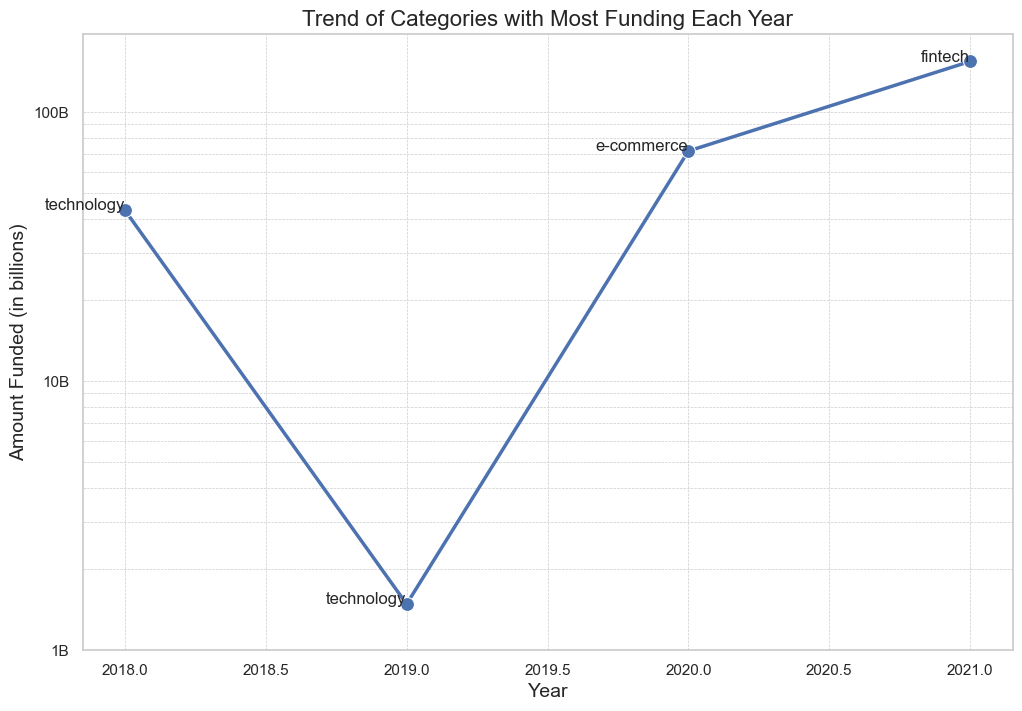

In [11]:
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=max_funding_by_year, x='Fund_Year', y='Amount',
             marker='o', linewidth=2.5, markersize=10)

# Annotate the points with the category names
for i in range(len(max_funding_by_year)):
    plt.text(max_funding_by_year['Fund_Year'].iloc[i], max_funding_by_year['Amount'].iloc[i],
             max_funding_by_year['Category'].iloc[i], fontsize=12, ha='right')

# Add titles and labels
plt.title('Trend of Categories with Most Funding Each Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount Funded (in billions)', fontsize=14)

# Adjust the y-axis scale and format
plt.yscale('log')
plt.yticks([1e9, 1e10, 1e11], ['1B', '10B', '100B'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

##### Key Observations

1. **2018**:
   - **Leading Category**: Technology
   - **Funding Amount**: $43.25 billion
   - Technology dominated the funding landscape in 2018, attracting the highest investment compared to other sectors.

2. **2019**:
   - **Leading Category**: Technology
   - **Funding Amount**: $1.48 billion
   - Technology continued to be the leading category in terms of funding, although the total amount was significantly lower than in 2018.

3. **2020**:
   - **Leading Category**: E-commerce
   - **Funding Amount**: $71.67 billion
   - E-commerce emerged as the most funded category in 2020, reflecting a shift in investor focus, possibly influenced by the global pandemic and increased online shopping activities.

4. **2021**:
   - **Leading Category**: Fintech
   - **Funding Amount**: $154.31 billion
   - Fintech saw a dramatic increase in funding, becoming the most funded category in 2021. This surge indicates a strong interest in financial technologies, likely driven by the growing demand for digital financial services.

##### Analysis
- **Trend Shift**: There is a noticeable shift in the dominant categories over the years. While technology was the leading category in 2018 and 2019, e-commerce took the lead in 2020, followed by fintech in 2021.
- **Investment Focus**: The changing categories highlight the evolving focus of investors, adapting to market demands and global events such as the COVID-19 pandemic.
- **Logarithmic Scale**: The use of a logarithmic scale on the y-axis allows for better visualization of the wide range of funding amounts, from billions to hundreds of billions, making the trend more comprehensible.




### 2.	What is the distribution of funding amounts among start-ups (e.g., average, median, and range) each year? 

In [40]:
# Calculate the distribution of funding amounts each year
funding_distribution = data.groupby('Fund_Year')['Amount'].agg(
    ['mean', 'median', 'min', 'max']).reset_index()
funding_distribution['range'] = funding_distribution['max'] - \
    funding_distribution['min']

# Format the columns to not use scientific notation
funding_distribution['mean'] = funding_distribution['mean'].apply(lambda x: f"{x:,.2f}")
funding_distribution['median'] = funding_distribution['median'].apply(lambda x: f"{x:,.0f}")
funding_distribution['min'] = funding_distribution['min'].apply(lambda x: f"{x:,.0f}")
funding_distribution['max'] = funding_distribution['max'].apply(lambda x: f"{x:,.0f}")
funding_distribution['range'] = funding_distribution['range'].apply(lambda x: f"{x:,.0f}")


funding_distribution

,Fund_Year,mean,median,min,max,range
0,2018,"172,200,688.55","1,400,000",0,"20,000,000,000","20,000,000,000"
1,2019,"37,488,013.48","5,500,000",0,"693,000,000","693,000,000"
2,2020,"85,595,835.17","1,400,000",0,"70,000,000,000","70,000,000,000"
3,2021,"150,899,769.75","2,500,000",0,"150,000,000,000","150,000,000,000"


#### Observations:
- **Increasing Mean Funding**: There was a significant increase in the mean funding amount from 2018 to 2021, with a notable dip in 2019. This could reflect larger, more ambitious funding rounds, especially in 2021.
- **Variable Median Funding**: The median funding amount fluctuates, suggesting varied investment sizes that might cater to both early-stage and mature start-ups.
- **Expanding Funding Range**: The range of funding dramatically increased in 2021, indicating a few extremely high-value investments during this year.


### 3. what are the average Funding Amounts for Different Funding Stages?

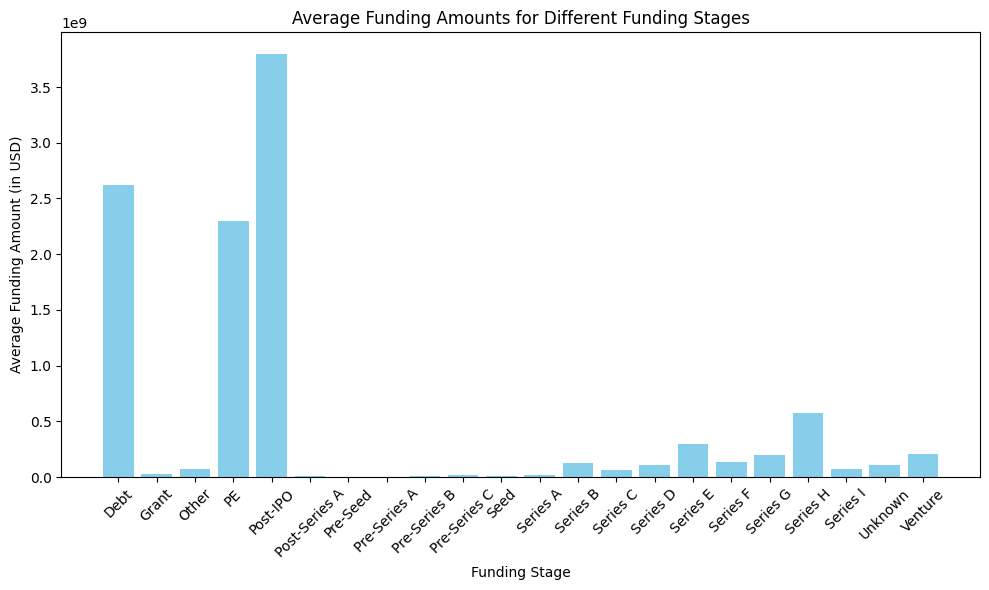

In [50]:
# Grouping by Stage and calculating the mean funding amount for each stage
average_funding_by_stage = df.groupby('Stage')['Amount'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(average_funding_by_stage['Stage'],
        average_funding_by_stage['Amount'], color='skyblue')
plt.xlabel('Funding Stage')
plt.ylabel('Average Funding Amount (in USD)')
plt.title('Average Funding Amounts for Different Funding Stages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Key Observations:
- **High Investments in IPO and Grants**: The 'IPO' stage shows the highest average funding, followed closely by 'Grant'. These stages indicate significant capital investments likely due to the scale and maturity of businesses reaching IPO or receiving substantial grants.
- **Private Equity and Debt Funding**: Both 'Private Equity (PE)' and 'Debt' funding stages also show considerable average funding amounts, suggesting strong financial support for start-ups in these stages.
- **Early and Middle Stages**: The 'Pre-Seed', 'Seed', and 'Series A' stages, although lower in comparison, still receive notable funding, essential for the early growth phases of start-ups.
- **Series Rounds Variation**: From 'Series B' onward, there is a drop in the average funding with fluctuations, peaking again at 'Series E'. This could reflect the varying success and growth potential perceived by investors in different rounds.


### 4. What are the average funding amounts for different funding stages (e.g., Seed, Series A, Series B, etc.) each year? 

<Figure size 1600x1000 with 0 Axes>

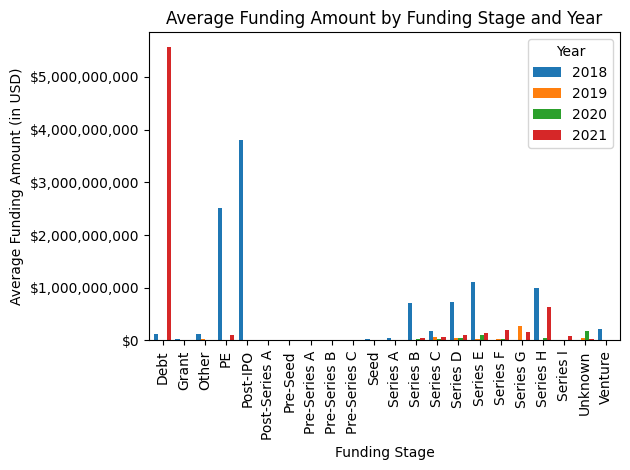

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Convert 'Fund_Year' and 'Amount' columns to numeric types
data['Fund_Year'] = pd.to_numeric(data['Fund_Year'])
data['Amount'] = pd.to_numeric(data['Amount'])

# Group by 'Stage' and 'Fund_Year' and calculate the average funding amount
average_funding = data.groupby(['Stage', 'Fund_Year'])['Amount'].mean()

# Create a bar chart
plt.figure(figsize=(16, 10))  # Adjust figsize for larger visual
colors = plt.cm.tab10.colors
average_funding.unstack().plot(kind='bar', color=colors,
                               width=0.8)  # Adjust width here

# Add labels and title
plt.xlabel('Funding Stage')
plt.ylabel('Average Funding Amount (in USD)')
plt.title('Average Funding Amount by Funding Stage and Year')

# Format y-axis ticks to avoid exponential notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Show the plot
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

#### Key Observations:
- **Debt and Grant Funding**: The highest average funding amounts are observed in the 'Debt' and 'Grant' categories for 2018, significantly higher than other stages and years. This might indicate large-scale funding initiatives or government grants that were prominent in that year.
- **Post-IPO**: A notable peak in 'Post-IPO' funding in 2019 suggests successful public offerings, which could correlate with increased market confidence or favorable economic conditions at that time.
- **Early-Stage Funding**: 'Pre-Seed' and 'Seed' stages show consistent investment across the years but at much lower scales compared to more mature stages. This consistency indicates a steady interest in early-stage start-ups.
- **Series Rounds**: Funding in the 'Series A' to 'Series H' stages shows variability, with 'Series A' and 'Series B' generally attracting more funding than later rounds, suggesting that investors may prefer to engage at these somewhat earlier stages of venture maturation.



### 5.	How does funding vary within the various geographical locations for start-ups?

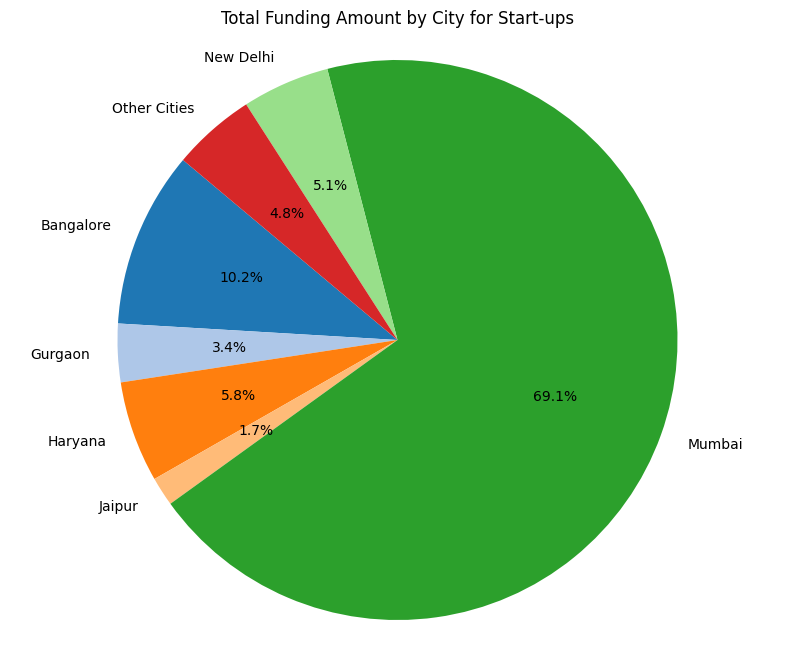

In [33]:
# Grouping by 'HeadQuarter' and summing the 'Amount'
funding_by_location = data.groupby('HeadQuarter')['Amount'].sum().reset_index()

# Calculating the total funding
total_funding = funding_by_location['Amount'].sum()

# Determining the percentage contribution of each city
funding_by_location['Percentage'] = (funding_by_location['Amount'] / total_funding) * 100

# Separating cities with more than 1% funding
significant_cities = funding_by_location[funding_by_location['Percentage'] > 1]
other_cities = funding_by_location[funding_by_location['Percentage'] <= 1]

# Summing up the funding for other cities
other_cities_funding = other_cities['Amount'].sum()
other_cities_percentage = other_cities['Percentage'].sum()

# Adding 'Other Cities' to the significant cities dataframe
other_cities_row = pd.DataFrame({'HeadQuarter': ['Other Cities'], 'Amount': [other_cities_funding], 'Percentage': [other_cities_percentage]})
significant_cities = pd.concat([significant_cities, other_cities_row], ignore_index=True)

# Using a seaborn color palette
colors = sns.color_palette('tab20', len(significant_cities))

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(significant_cities['Amount'], labels=significant_cities['HeadQuarter'],
        autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Total Funding Amount by City for Start-ups')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


#### Observations:
- **Mumbai** stands out as the leading city in terms of start-up funding, receiving a substantial 69.1% of the total funding. This indicates a significant concentration of investment activities in Mumbai compared to other cities.
- **Bangalore**, known for its vibrant tech start-up community, follows with 10.2% of the funding. While substantial, it's notably lower than Mumbai, suggesting differing investor focus and possibly the sectors they invest in.
- **New Delhi** and **Gurgaon**, key players in the Northern India start-up scene, collectively account for around 8.2% of the funding, highlighting their roles but also suggesting room for growth compared to their southern counterparts.
- **Other Cities** together make up 11.6% of the total funding, indicating that while the majority of funds are concentrated in major cities, there is a spread across the country, supporting smaller hubs and diverse start-up ventures.

